# Project

In [1]:
# Prediction of survivers on titanic cruise in titanic dataset using XG_Boost algorithm.

# Introduction

In [2]:
# The Titanic Dataset consists of eight hundred ninty one samples.
# Each samples has twelve features; PassengerId, Survived, Pclass, Name, Sex
#                                  ,Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.

# Problem Domain

In [3]:
# we have Csv file of Titanic dataset and we see There are 12  features in dataset 
# which is in numerical form and 4 label which is in categorical (string) form.
# There are Some Null_values in there.
# so we use Supervised machine learning for better prediction our model.
# our model doesn't take string format so we convert string format to numerical format.

# Solution Domain

In [4]:
# XGBoost is an optimized distributed gradient boosting library designed for efficient and 
# scalable training of machine learning models.
# It is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger prediction.
# XGBoost stands for “Extreme Gradient Boosting” and it has become one of the most popular and 
# widely used machine learning algorithms due to its ability to handle large datasets and 
# its ability to achieve state-of-the-art performance in many machine learning tasks such as classification and regression.

# One of the key features of XGBoost is its efficient handling of missing values,
# which allows it to handle real-world data with missing values without requiring significant pre-processing. 
# Additionally, XGBoost has built-in support for parallel processing, 
# making it possible to train models on large datasets in a reasonable amount of time.

# XGBoost is an implementation of Gradient Boosted decision trees.
# In this algorithm, decision trees are created in sequential form.
# Weights(data) play an important role in XGBoost.
# Weights(data) are assigned to all the independent variables which are then fed into the decision tree which predicts results.
# The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.

# Technology Used

In [5]:
# We used Jupyter Notebook for Iris dataset algorithm and also used diffent types of library from python such as numpy, pandas 
# ,matplotlib, seaborn, Scikit-Learn and XGBoost.

# Existing Solution

# 1.Importing and preperation of data

# Import libraries

In [6]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [7]:
# Import the Dataset
titanic_data=pd.read_csv("D://Titanic-Dataset.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Summarize the Dataset

In [8]:
# It gives first 5 rows data from dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# It gives last 5 rows data from dataset
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
# It shows the information of dataset
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# It describe the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# It shows all Null values in dataset
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic_data.groupby('Sex')['Age'].mean().reset_index()

,Sex,Age
0,female,27.915709
1,male,30.726645


In [14]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)
sex= titanic_data['Sex'].value_counts()
sex

Sex
male      577
female    314
Name: count, dtype: int64

# Data Visualization

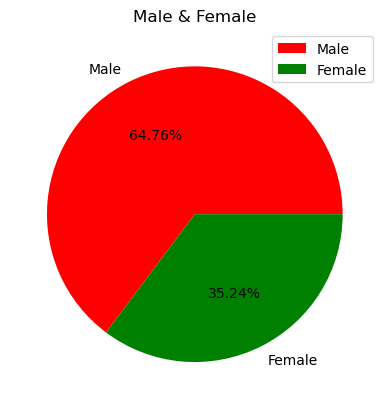

In [15]:
plt.pie(sex, labels=['Male', 'Female'] ,autopct='%.2f%%', colors=['red','green'])
plt.legend()
plt.title('Male & Female')
plt.show()

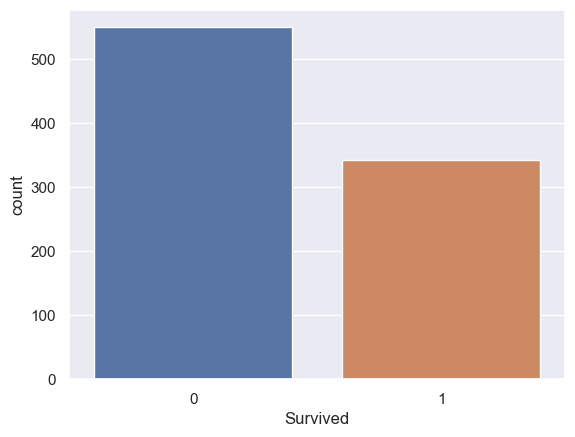

In [16]:
sns.set()
sns.countplot(x="Survived",data=titanic_data)
plt.show()

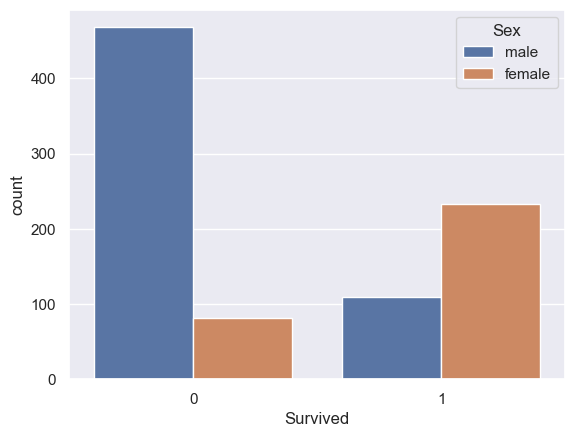

In [17]:
sns.set()
sns.countplot(x="Survived",hue="Sex",data=titanic_data)
plt.show()

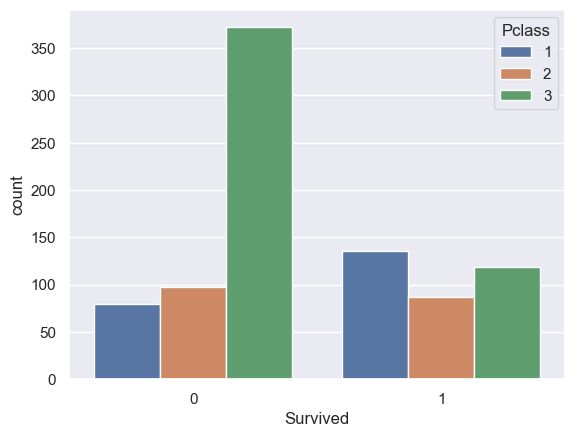

In [18]:
sns.set()
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)
plt.show()

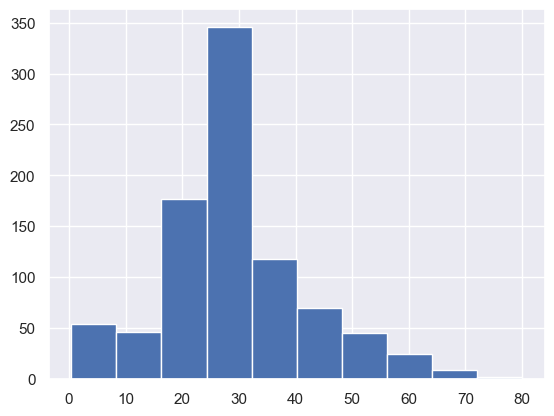

In [19]:
plt.hist(titanic_data["Age"])
plt.show()

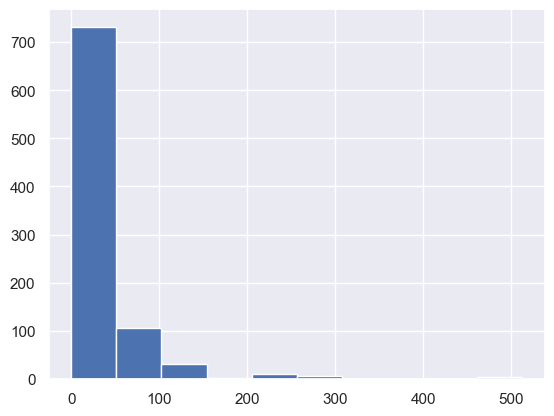

In [20]:
plt.hist(titanic_data['Fare'])
plt.show()

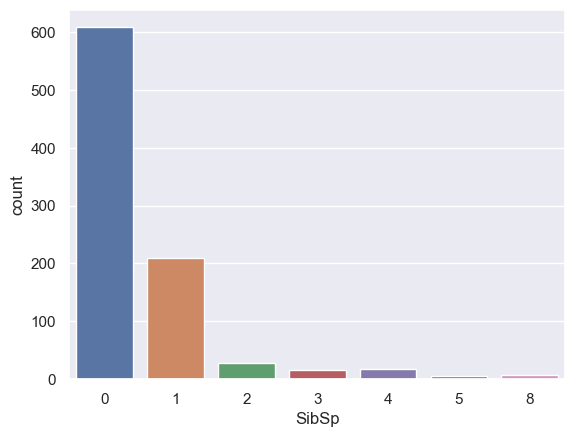

In [21]:
sns.countplot(x="SibSp",data=titanic_data)
plt.show()

# Label encoding

In [22]:
# since some of the data in dataset is in string for we have to convert it in numerical form using label encoding.
# As XGBoost will strongly interpret this feature of having numerical relationship.

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
titanic_data['Sex']=encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked']=encoder.fit_transform(titanic_data['Embarked'])

In [23]:
# Dividing data into features(independent variable) and labels(dependent variable)

x=titanic_data.drop(["Name","Ticket","Survived","Cabin","PassengerId"],axis=1)
y=titanic_data.Survived

In [24]:
# dropna method will modify the DataFrame directly meaning it will drop all missing values from your original dataset.

titanic_data.dropna(inplace=True)

In [25]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [27]:
# it shows every feature correlations to each other
Cor=x.corr()
Cor

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


<Axes: >

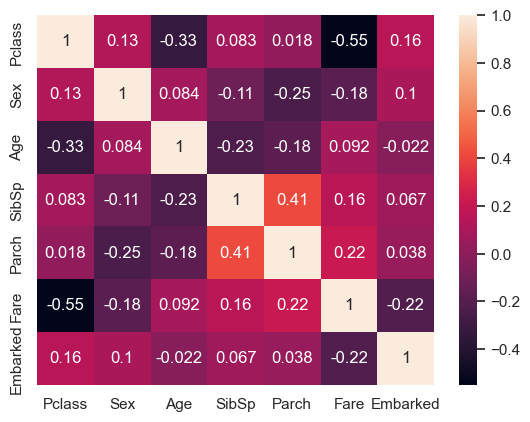

In [38]:
sns.heatmap(Cor,annot=True)

# Importing additional XGBoost Library

In [28]:
from xgboost import XGBClassifier

# Instantiate learning model 
classifier=XGBClassifier()

# Fitting the model
classifier.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Spliting dataset into training set and test set

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [30]:
# it shows the shape of feature ,training data of feature and testing data of feature
x.shape,x_train.shape,x_test.shape

((891, 7), (668, 7), (223, 7))

In [31]:
# Predicting the test set of dataset
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1])

In [32]:
#Evaluating predictions

pre = classifier.predict([[3,1,22.000000,1,0,7.2500,2]])
if(pre==1):
    print("traveler is survived" , pre)

else:
    print("traveler is non survived" , pre)

traveler is non survived [0]


In [33]:
# Loading libraries
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Classification report our model

In [34]:
cr=classification_report(y_test,y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96       128\n           1       0.99      0.89      0.94        95\n\n    accuracy                           0.95       223\n   macro avg       0.96      0.94      0.95       223\nweighted avg       0.95      0.95      0.95       223\n'

# Building Confusion matrix

In [35]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[127,   1],
       [ 10,  85]], dtype=int64)

# Plotting heatmap of confusion matrix

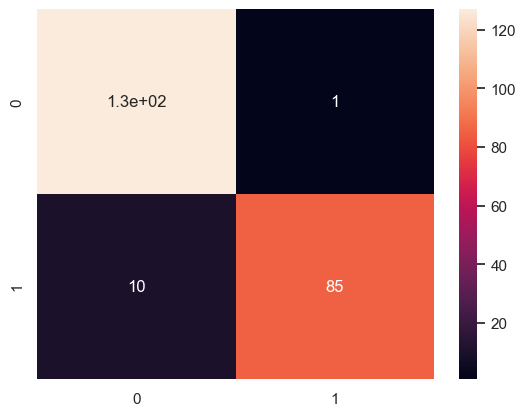

In [36]:
sns.heatmap(cf,annot=True)
plt.show()

# Accuracy Score

In [37]:
ac=accuracy_score(y_test,y_pred)
print ("Accuracy score of our model is" ,round(ac*100,2))

Accuracy score of our model is 95.07


# Conclusion

In [ ]:
# Performance: XGBoost has a strong track record of producing high-quality results in various machine learning tasks
#             ,especially in Kaggle competitions, where it has been a popular choice for winning solutions.

# Scalability: XGBoost is designed for efficient and scalable training of machine learning models
#             ,making it suitable for large datasets,like the titanic dataset used in this surviver prediction.

# Customizability: XGBoost has a wide range of hyperparameters that can be adjusted to optimize performance
#                 ,making it highly customizable.

# Handling of Missing Values: XGBoost has built-in support for handling missing values
#                            ,making it easy to work with real-world data that often has missing values.

# Interpretability: Unlike some machine learning algorithms that can be difficult to interpret
#                   ,XGBoost provides feature importances, allowing for a better understanding 
#                   of which variables are most important in making predictions.